In [1]:
import pynbody
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from kinetic_measure import *
import scipy.stats as ss

ModuleNotFoundError: No module named 'pynbody'

In [ ]:
data_file = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000974'
param_file = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.param'
s = pynbody.load(data_file, paramfile = param_file)
s.physical_units()

In [2]:
data_file = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.004096'
param_file = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.param'
s = pynbody.load(data_file, paramfile = param_file)
s.physical_units()

In [ ]:
h = s.halos()
h0 = h[0]
pynbody.analysis.halo.center(h0,mode='hyb')
#pynbody.analysis.angmom.sideon(h0, cen=(0,0,0))

In [4]:
s_filt = s[pynbody.filt.Sphere('50 kpc')]


In [5]:
BCG_star = s_filt.star

In [105]:
posform = BCG_star['posform']

h2 information found in StarLog!


ValueError: shape mismatch: value array of shape (74565101,) could not be broadcast to indexing result of shape (74565100,)

In [ ]:
r50 = pynbody.analysis.luminosity.half_light_r(BCG_star)

In [8]:
def comp_analysis(h0, plot = False):
    def fit_2dV(x,a1,b1,a2,b2):
        return(-2.5*np.log10(10**(-(a1*x+b1)*0.4)+10**(-(a2*x+b2)*0.4)))

    def err_2dV(x,t,y):
        return(np.sqrt(np.sum((fit_2dV(t,x[0],x[1],x[2],x[3])-y)**2)))


    def get_re(alpha):
        return(3459*(alpha*0.4*np.log(10))**-4)

    p_star_2d = pynbody.analysis.profile.Profile(h0.star,type = 'log', min = 0.5, max = 200,nbins = 50)
    optim = so.minimize(err_2dV,x0 = (5,10,1,20), args=(p_star_2d['rbins']**0.25,p_star_2d['sb,v']))
    
    myf1 = np.poly1d((optim['x'][0],optim['x'][1]))
    myf2 = np.poly1d((optim['x'][2],optim['x'][3]))
    
    re1 = get_re(optim['x'][0])
    re2 = get_re(optim['x'][2])
    

    if plot == True:
        plt.plot(p_star_2d['rbins'],p_star_2d['sb,v'], label = 'BCG', c = 'k', linestyle = '-',linewidth = 3)
        plt.plot(np.linspace(0.8,4,50)**4,myf1(np.linspace(0.8,4,50)), c = 'r', linestyle = '--', label = 'deV, inner (R$_{50}$ = '+str(round(re1,2))+' kpc)')
        plt.plot(np.linspace(0.8,4,50)**4,myf2(np.linspace(0.8,4,50)), c = 'r', linestyle = ':', label = 'deV, outer (R$_{50}$ = '+str(round(re2,2))+' kpc)')

        plt.axvline(re1,linestyle = '--', c = 'k')
        plt.axvline(re2,linestyle = ':', c = 'k')

        plt.legend()
        plt.ylim(29,17)
        plt.xscale('log')
        plt.xlabel('r [kpc]')
        plt.ylabel('v band surface brightness [mag arcsec$^{2}$]')
        
        plt.show()
        
    return(re1,re2)
    

/home/seoyoung/anaconda3/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


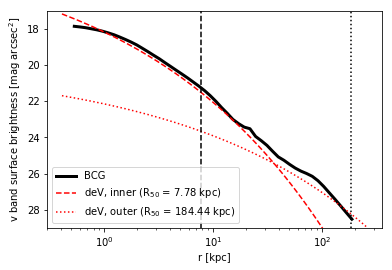

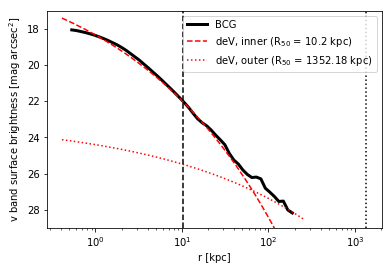

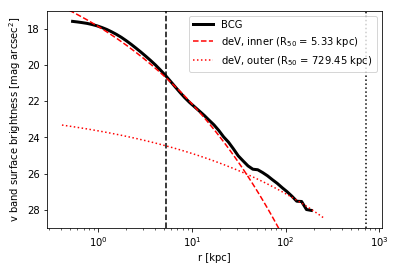

In [9]:
re1_random1,re2_random1 = comp_analysis(h0, plot = True)

h0.rotate_x(90)
re1_random2,re2_random2 = comp_analysis(h0, plot = True)

h0.rotate_y(90)
re1_random3,re2_random3 = comp_analysis(h0, plot = True)

h0.rotate_x(-90)
h0.rotate_y(-90)

In [11]:
v_rot, sig_3d = kine_3d(BCG_star[BCG_star['r']<r50], spin_part = BCG_star[BCG_star['r']<r50])

/home/seoyoung/anaconda3/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


In [12]:
print(v_rot)
print(sig_3d)
print(v_rot/sig_3d)

201.47377347155037
631.770465160443
0.31890343816624056


In [13]:
v_rot_gas, sig_3d_gas = kine_3d(s_filt.gas[s_filt.gas['r']<r50], spin_part = s_filt.gas[s_filt.gas['r']<r50])

/home/seoyoung/anaconda3/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


In [14]:
print(v_rot_gas)
print(sig_3d_gas)
print(v_rot_gas/sig_3d_gas)

51.92556922648592
234.69292858336115
0.22124897217788286


h2 information found in StarLog!
h2 information found in StarLog!


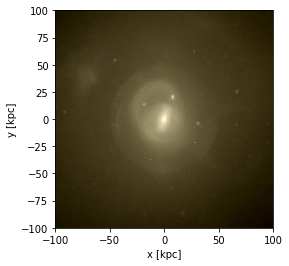

In [9]:
s_filt.rotate_x(90)
s_filt.rotate_y(90)

pynbody.plot.stars.render(h0,width='200 kpc', resolution = 500, dynamic_range = 4)

In [13]:
pynbody.analysis.angmom.faceon(h0, cen=(0,0,0))

In [ ]:
r50 = []
r50_cyl = []
for filt_size in range(10,210,20):
    print(filt_size)
    s_filt = s[pynbody.filt.Sphere(str(filt_size)+' kpc')]
    r50.append(pynbody.analysis.luminosity.half_light_r(s_filt.s, band = 'r'))
    r50_cyl.append(pynbody.analysis.luminosity.half_light_r(s_filt.s, band = 'r', cylindrical = True))

In [ ]:
plt.scatter(np.arange(10,110,10),r50)
plt.scatter(np.arange(10,110,10),r50_cyl)

plt.xlabel('Filter radius [kpc]')
plt.ylabel('R50 [kpc]')

In [29]:
pynbody.analysis.angmom.sideon(h0, cen=(0,0,0))

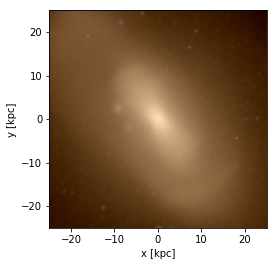

In [61]:
rgb = pynbody.plot.stars.render(s_filt, resolution = 1500,r_band='j', dynamic_range = 4,ret_im = True)